In [1]:
import pandas as pd
# Cargar los archivos CSV desde el directorio anterior
boards = pd.read_excel('boards.xlsx', header=None)
#solutionDF = pd.read_csv('../solcomas.csv')
#noSolutionDF = pd.read_csv('output_nosol - copia 2.csv')
#solutionDF = pd.read_csv('output_sol - copia 2.csv')

c:\Users\Hans\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
import numpy as np

'''noSolutionCount = noSolutionDF.shape[0]
solutionCount = solutionDF.shape[0]

print(noSolutionCount)
print(solutionCount)

noSolutionLabel = [0] * noSolutionCount*6
solutionLabel = [1] * solutionCount *6
Y = noSolutionLabel + solutionLabel
Y = np.array(Y) 
print(Y)'''

# Paso 5: Obtener la primera y segunda columna
first_column = boards.iloc[:, 0].to_list()
print(first_column)

second_column = boards.iloc[:, 1].to_list()
repeated_elements = [element for element in second_column for _ in range(6)]
Y = np.array(repeated_elements)
print(Y)

['################\n###   #        #\n### $ $ $ $ #$ #\n### #$# ###  $ #\n### # .....##$##\n###  ...+..  $ #\n####$# ....# # #\n#    #### # $$ #\n# $#    $$ $ # #\n# $ ..#        #\n################\n', '##############\n####      ####\n#### $$#  ####\n#### #  $    #\n#   $#..##$$ #\n#  # .+..  # #\n# #  .... #  #\n# $$##..#$   #\n#    $  # ####\n####  # $ ####\n####   #$ ####\n####      ####\n##############\n', '##############\n####      ####\n#### $##  ####\n####  $ $    #\n#   $#..##$$ #\n#  # ..*.*+# #\n# #  ..*..#  #\n# $ ##..#$   #\n#  $ $ $# ####\n####  #   ####\n####$   # ####\n####      ####\n##############\n', '##################\n####            ##\n#### $ $ $  $ $ ##\n#  # $  ## ### ###\n#  ##$ #.. ..#$###\n# $ # ##.  +.#   #\n# $ # ##  #  # $ #\n#   . $.. ...$ $ #\n# $###$#.....##  #\n##    $ ##.####.##\n####$   $  #    ##\n####    ##.# $ ###\n#########  $   ###\n#########   #  ###\n##################\n', '###############\n####  #########\n#### $    #####\n#### ##     $ #\n

In [3]:
boards = []

for element in first_column:
    tableros_en_celda = element.split('\n')
    tableros_en_celda = list(filter(lambda x: x != '', tableros_en_celda))
    tablero_matriz = [list(fila) for fila in tableros_en_celda]
    boards.append(tablero_matriz)

'''with np.printoptions(threshold=np.inf):
    print(boards)'''

'with np.printoptions(threshold=np.inf):\n    print(boards)'

In [4]:
def Rotate_90(tablero):
    return np.rot90(tablero, k=1)

def Rotate_180(tablero):
    return np.rot90(tablero, k=2)

def Rotate_270(tablero):
    return np.rot90(tablero, k=3)

def FlipX(tablero):
    return np.fliplr(tablero)

def FlipY(tablero):
    return np.flipud(tablero)

# Data augmentation
aug_boards = []
for board in boards:
    board_np = np.array(board)
    aug_boards.append(board_np)  
    aug_boards.append(Rotate_90(board_np))  
    aug_boards.append(Rotate_180(board_np)) 
    aug_boards.append(Rotate_270(board_np))  
    aug_boards.append(FlipX(board_np))  
    aug_boards.append(FlipY(board_np))  

print("El tamaño de la lista `boards` es:", len(aug_boards))
with np.printoptions(threshold=np.inf):
    print(aug_boards[3])

El tamaño de la lista `boards` es: 19428
[['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']
 ['#' ' ' ' ' ' ' '#' '#' '#' '#' '#' '#' '#']
 ['#' '$' '$' ' ' '#' '#' '#' '#' '#' '#' '#']
 ['#' ' ' '#' ' ' '#' ' ' ' ' ' ' ' ' ' ' '#']
 ['#' '.' ' ' ' ' '$' ' ' '#' '#' '$' ' ' '#']
 ['#' '.' ' ' '#' '#' '.' ' ' '$' ' ' ' ' '#']
 ['#' '#' ' ' '#' ' ' '.' '.' '#' '$' '#' '#']
 ['#' ' ' ' ' '#' '.' '.' '.' ' ' ' ' ' ' '#']
 ['#' ' ' '$' '#' '.' '+' '.' '#' '$' ' ' '#']
 ['#' ' ' '$' ' ' '.' '.' '.' '#' ' ' ' ' '#']
 ['#' ' ' ' ' '#' '.' '.' '.' '#' '$' ' ' '#']
 ['#' ' ' '$' ' ' '#' ' ' '#' ' ' ' ' ' ' '#']
 ['#' ' ' ' ' '$' ' ' ' ' '#' ' ' '#' ' ' '#']
 ['#' ' ' '#' '$' '#' '$' '$' '$' '$' ' ' '#']
 ['#' ' ' ' ' ' ' ' ' ' ' '#' ' ' ' ' ' ' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']]


In [5]:
import numpy as np
count = 0
def tablero_a_tensor(tablero):
    alto = len(tablero)
    ancho = len(tablero[0])
    tensor = np.zeros((alto, ancho, 7))

    for i in range(alto):
        for j in range(ancho):
            elemento = tablero[i][j]
            if elemento == '#':
                tensor[i, j, 0] = 1
            elif elemento == '$':
                tensor[i, j, 1] = 1
            elif elemento == '.':
                tensor[i, j, 2] = 1
            elif elemento == '@':
                tensor[i, j, 3] = 1
            elif elemento == '*':
                tensor[i, j, 4] = 1
            elif elemento == '+':
                tensor[i, j, 5] = 1
            elif elemento == ' ':
                tensor[i, j, 6] = 1
                
    return tensor

X = [tablero_a_tensor(tablero) for tablero in aug_boards]

max_height = max(tensor.shape[0] for tensor in X)
max_width = max(tensor.shape[1] for tensor in X)
print(f"-> {max_height}")
print(f"-> {max_width}")

X_padded = np.zeros((len(X), max_height, max_width, 7))
additional_row = np.array([0, 0, 0, 0, 0, 0, 1])

for idx, tensor in enumerate(X):
    height = tensor.shape[0]
    width = tensor.shape[1]
    
    X_padded[idx, :height, :width, :] = tensor
    # Añade hasta alcanzar el alto maximo
    for h in range(height, max_height):
        X_padded[idx, h, :7, :] = additional_row
    # ancho
    for w in range(width, max_width):
        X_padded[idx, :height, w, :] = additional_row



with np.printoptions(threshold=np.inf):
    print(aug_boards[1])
    print(X[1])
    print("-----------------\n")
    print(X_padded[1])
        


-> 49
-> 49
[['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']
 ['#' ' ' ' ' ' ' '#' ' ' ' ' ' ' ' ' ' ' '#']
 ['#' ' ' '$' '$' '$' '$' '#' '$' '#' ' ' '#']
 ['#' ' ' '#' ' ' '#' ' ' ' ' '$' ' ' ' ' '#']
 ['#' ' ' ' ' ' ' '#' ' ' '#' ' ' '$' ' ' '#']
 ['#' ' ' '$' '#' '.' '.' '.' '#' ' ' ' ' '#']
 ['#' ' ' ' ' '#' '.' '.' '.' ' ' '$' ' ' '#']
 ['#' ' ' '$' '#' '.' '+' '.' '#' '$' ' ' '#']
 ['#' ' ' ' ' ' ' '.' '.' '.' '#' ' ' ' ' '#']
 ['#' '#' '$' '#' '.' '.' ' ' '#' ' ' '#' '#']
 ['#' ' ' ' ' '$' ' ' '.' '#' '#' ' ' '.' '#']
 ['#' ' ' '$' '#' '#' ' ' '$' ' ' ' ' '.' '#']
 ['#' ' ' ' ' ' ' ' ' ' ' '#' ' ' '#' ' ' '#']
 ['#' '#' '#' '#' '#' '#' '#' ' ' '$' '$' '#']
 ['#' '#' '#' '#' '#' '#' '#' ' ' ' ' ' ' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']]
[[[1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0

Epoch 1/35
486/486 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - loss: 23270.7109 - mae: 85.8577 - val_loss: 12648.0596 - val_mae: 64.8457
Epoch 2/35
486/486 ━━━━━━━━━━━━━━━━━━━━ 31s 63ms/step - loss: 7404.1943 - mae: 48.4632 - val_loss: 5659.4922 - val_mae: 42.2566
Epoch 3/35
486/486 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - loss: 6631.2334 - mae: 45.1984 - val_loss: 12865.1289 - val_mae: 61.2409
Epoch 4/35
486/486 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - loss: 5771.1821 - mae: 44.1247 - val_loss: 5120.6802 - val_mae: 44.5633
Epoch 5/35
486/486 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - loss: 6495.0923 - mae: 45.9078 - val_loss: 5045.8340 - val_mae: 44.0175
Epoch 6/35
486/486 ━━━━━━━━━━━━━━━━━━━━ 30s 62ms/step - loss: 5002.9102 - mae: 41.4696 - val_loss: 4524.8101 - val_mae: 35.6826
Epoch 7/35
486/486 ━━━━━━━━━━━━━━━━━━━━ 31s 64ms/step - loss: 4672.5020 - mae: 39.9698 - val_loss: 5443.7202 - val_mae: 38.0729
Epoch 8/35
486/486 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - loss: 4095.2231 - mae: 38.8409 - val_loss: 50

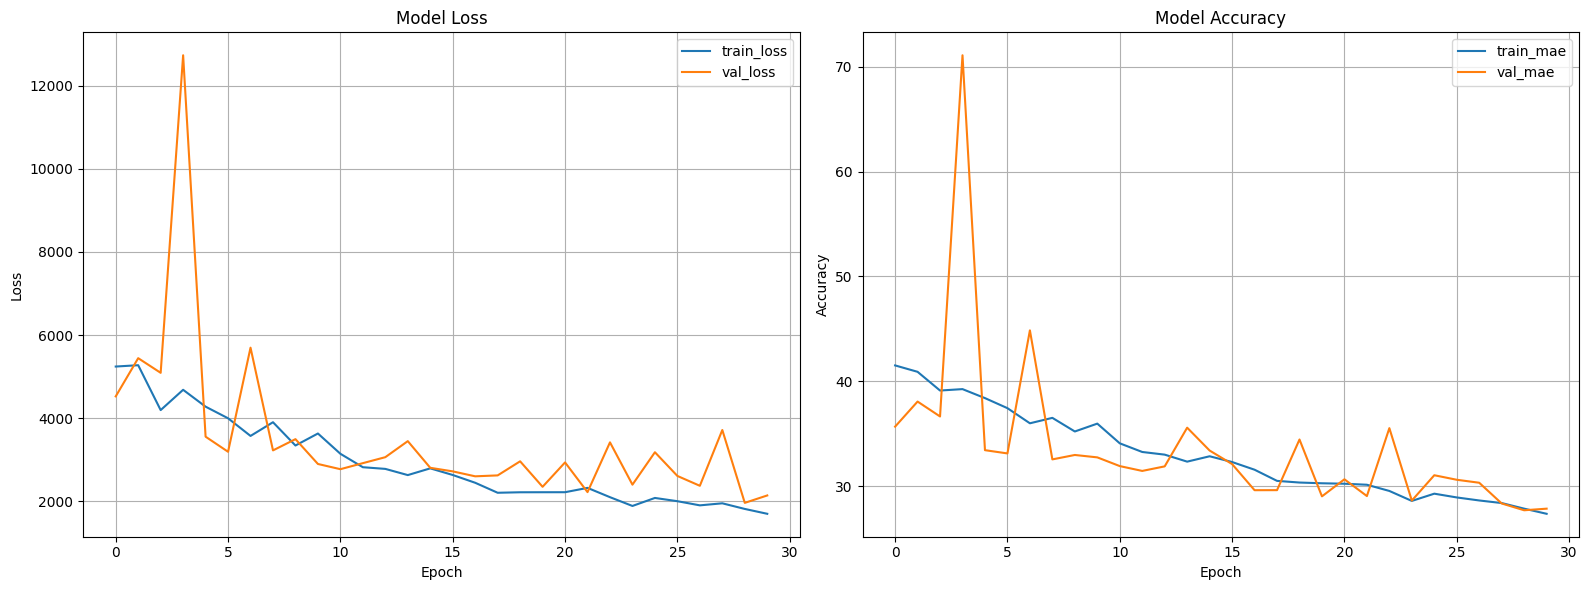

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Dropout, GlobalMaxPooling2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y, test_size=0.2, random_state=23)

maxEpochs = 35

max_height = X_padded.shape[1]
max_width = X_padded.shape[2]
channels = X_padded.shape[3]
input_shape = (max_height, max_width, channels)

input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = AveragePooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = AveragePooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = AveragePooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(filters=1, kernel_size=1, activation='relu', padding='same')(x)
#Condensa todos los valores de x * y * 1 a un solo valor 
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)

output_layer = Dense(1)(x)



model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, Y_train, epochs=maxEpochs, batch_size=32, validation_data=(X_test, Y_test), verbose=1)



predictions = model.predict(X_test)


mse = mean_squared_error(Y_test, predictions)
print(f'MSE: {mse}')
mae = mean_absolute_error(Y_test, predictions)
print(f'MAE: {mae}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(Y_test, predictions)
print(f'R²: {r2}')


trimmed_history = {}
for key in history.history.keys():
    trimmed_history[key] = history.history[key][5:]



plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(trimmed_history['loss'], label='train_loss')
plt.plot(trimmed_history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(trimmed_history['mae'], label='train_mae')
plt.plot(trimmed_history['val_mae'], label='val_mae')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()  
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


X = X_padded
Y = Y

maxEpochs = 50

max_height = X_padded.shape[1]
max_width = X_padded.shape[2]
channels = X_padded.shape[3]
input_shape = (max_height, max_width, channels)


k = 3  
kf = KFold(n_splits=k, shuffle=True, random_state=23)


all_accuracy = []
all_val_accuracy = []
all_loss = []
all_val_loss = []

fold_no = 1

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    input_layer = Input(shape=input_shape)
    x = Conv2D(32, (4), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Conv2D(32, (4), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = AveragePooling2D((2, 2))(x)
    x = Dropout(0.1)(x)

    x = Conv2D(64, (4), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (4), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = AveragePooling2D((2, 2))(x)
    x = Dropout(0.1)(x)
    x = Conv2D(64, (4), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = AveragePooling2D((2, 2))(x)
    x = Dropout(0.1)(x)

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)

    
    output_layer = Dense(1)(x)

    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mean_squared_error')


    #model = Model(inputs=input_layer, outputs=output_layer)
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    print(f'Training fold {fold_no} ...')
    history = model.fit(X_train, Y_train, epochs=maxEpochs, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

    
    all_accuracy.append(history.history['accuracy'])
    all_val_accuracy.append(history.history['val_accuracy'])
    all_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])
    
    fold_no += 1


all_accuracy = np.array(all_accuracy)
all_val_accuracy = np.array(all_val_accuracy)
all_loss = np.array(all_loss)
all_val_loss = np.array(all_val_loss)


mean_accuracy = np.mean(all_accuracy, axis=0)
mean_val_accuracy = np.mean(all_val_accuracy, axis=0)
mean_loss = np.mean(all_loss, axis=0)
mean_val_loss = np.mean(all_val_loss, axis=0)


print(f'epochs: {len(range(1, maxEpochs+1))}, mean_accuracy: {mean_accuracy.shape}')
print(f'mean_accuracy: {mean_accuracy}')
print(f'mean_val_accuracy: {mean_val_accuracy}')
print(f'mean_loss: {mean_loss}')
print(f'mean_val_loss: {mean_val_loss}')

# Graficar las métricas
epochs = range(1, maxEpochs+1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, mean_accuracy, 'o-', label='Training Accuracy')
plt.plot(epochs, mean_val_accuracy, 'o-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Average Training and Validation Accuracy per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mean_loss, 'o-', label='Training Loss', color='r')
plt.plot(epochs, mean_val_loss, 'o-', label='Validation Loss', color='g')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Training and Validation Loss per Epoch')
plt.legend()

plt.tight_layout()
plt.show()


Training fold 1 ...
Epoch 1/50
405/405 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - loss: 15470.9238 - val_loss: 21645.3535
Epoch 2/50
363/405 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 7825.7163

KeyboardInterrupt: 